此行代码的命令：安装Fastai相关的工具包到 Colab 笔记上，每次都需要运行

In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   609  100   609    0     0   2121      0 --:--:-- --:--:-- --:--:--  2121
Updating fastai...
Done.


载入 fastai 的模块（使用*导入所有，在软件工程领域，这种写法是不提倡的，但是在数据科学 DataScience 方面，快速制作原型方面，是实用的。

In [0]:
from fastai import *
from fastai.vision import *


从 Dataset 中载入预置常量地址的数据集，使用help查看untar_data()函数

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



这一次，换一个数据集，跟2018版的示例一样，用的是 Dog VS Cats 的图片数据集。进一步熟悉 Fastai 的各种工具包。

In [4]:
path = untar_data(URLs.DOGS)
path

PosixPath('/root/.fastai/data/dogscats')

查看 path 地址下的文件夹列表

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/dogscats/train'),
 PosixPath('/root/.fastai/data/dogscats/sample'),
 PosixPath('/root/.fastai/data/dogscats/valid'),
 PosixPath('/root/.fastai/data/dogscats/test1')]

In [0]:
path_imgs = path/'train'

我们要查看训练集文件夹 train 里头的文件名

In [7]:
path_imgs.ls()

[PosixPath('/root/.fastai/data/dogscats/train/dogs'),
 PosixPath('/root/.fastai/data/dogscats/train/cats')]

In [0]:
cat_imgs = path/'train/cats'

In [9]:
cat_fnames = get_image_files(cat_imgs)
cat_fnames[:5]

[PosixPath('/root/.fastai/data/dogscats/train/cats/cat.6286.jpg'),
 PosixPath('/root/.fastai/data/dogscats/train/cats/cat.7693.jpg'),
 PosixPath('/root/.fastai/data/dogscats/train/cats/cat.7546.jpg'),
 PosixPath('/root/.fastai/data/dogscats/train/cats/cat.3796.jpg'),
 PosixPath('/root/.fastai/data/dogscats/train/cats/cat.1429.jpg')]

In [0]:
doc(ImageDataBunch.from_folder)

最简单的数据集转换方法，从 folder 导入图片数据集。

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224,bs=32).normalize(imagenet_stats)

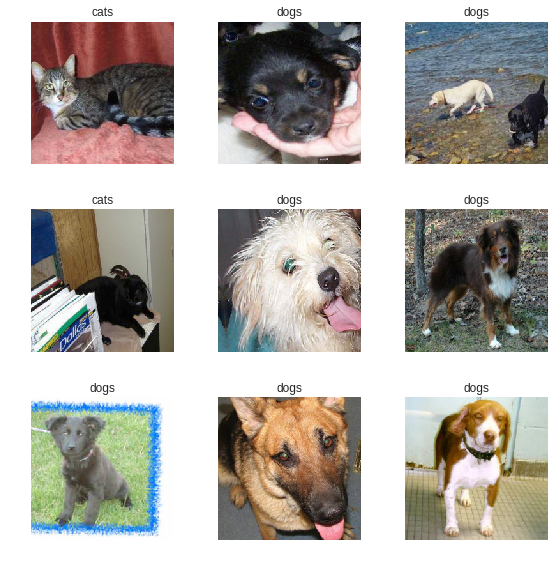

In [12]:
data.show_batch(3,figsize=(8,8))

定义卷积神经网络模型，采用预置模型，经典的 ResNets50

In [13]:
learner = create_cnn(data,models.resnet50,metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 69271723.93it/s]


In [14]:
learner.fit(1) 

epoch,train_loss,valid_loss,accuracy
1,0.062763,0.039073,0.987500


查看模型的结构，每一层的具体设置

In [17]:
print(learner.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [32, 64, 112, 112]   9408       False     
______________________________________________________________________
BatchNorm2d          [32, 64, 112, 112]   128        True      
______________________________________________________________________
ReLU                 [32, 64, 112, 112]   0          False     
______________________________________________________________________
MaxPool2d            [32, 64, 56, 56]     0          False     
______________________________________________________________________
Conv2d               [32, 64, 56, 56]     4096       False     
______________________________________________________________________
BatchNorm2d          [32, 64, 56, 56]     128        True      
______________________________________________________________________
Conv2d               [32, 64, 56, 56]     36864      False     
______________________________________________________________

In [0]:
learner.unfreeze()

In [19]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.084849,0.037021,0.986000


In [0]:
learner.save('dogcat_resnet')

查看模型的预测表现

In [0]:
img = data.train_ds[0][0]

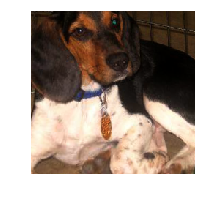

In [24]:
img.show()

In [23]:
learner.predict(img)

(Category dogs, tensor(1), tensor([0.0020, 0.9980]))

In [0]:
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)

In [29]:
interp.most_confused(slice_size=10)

[('dogs', 'cats', 15), ('cats', 'dogs', 13)]

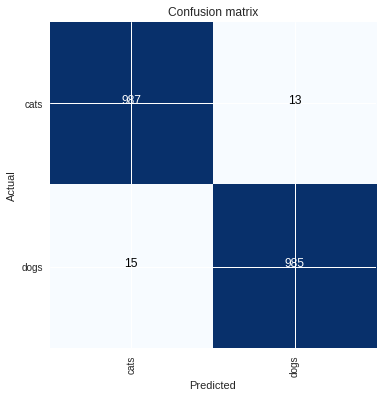

In [28]:
interp.plot_confusion_matrix()

预测loss 值最大的9张图片，可以看出，这些图片有部分不是猫狗图片，有的图片是猫狗瞳孔，有的是人类女性，有的包含了人与宠物。
在猫狗图片的二元分类问题上，深度学习的 ResNets50轻松完成任务。

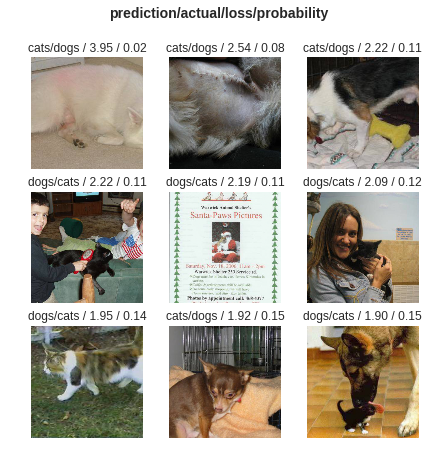

In [30]:
interp.plot_top_losses(9, figsize=(7,7))